# Problem Statement
The objective of this analysis is to understand usage patterns and behaviors in Uber ride data, focusing on key features such as **trip timing, distance, purpose**, and **location**. The aim is to extract actionable insights that can help businesses or ride-hailing services improve **logistics planning, resource allocation, and customer service efficiency**.

This dataset includes Uber trip logs with attributes like trip start/end time, category (Business/Personal), miles traveled, start and stop locations, and purpose of the trip.



# Import Libraries

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [46]:
data = pd.read_csv('UberDataset.csv')
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [47]:
data.shape

(1156, 7)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [49]:
data.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [50]:
data.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [51]:
data['CATEGORY'].value_counts()

CATEGORY
Business    1078
Personal      77
Name: count, dtype: int64

In [52]:
data['START'].value_counts()

START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Krendle Woods         1
Fuquay-Varina         1
Wake Co.              1
Katunayake            1
Gampaha               1
Name: count, Length: 177, dtype: int64

In [53]:
data['STOP'].value_counts()

STOP
Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
                   ... 
El Cerrito            1
Fuquay-Varina         1
Wake Co.              1
Gampaha               1
Ilukwatta             1
Name: count, Length: 188, dtype: int64

In [54]:
locations = data['START'].value_counts().index
locations = list(filter(lambda loc: not re.match(r'^[A-Za-z\s]+$', loc), locations))
locations

['Kar?chi', 'R?walpindi', "Hell's Kitchen", 'Fuquay-Varina', 'Wake Co.']

In [55]:
data['PURPOSE'].value_counts()

PURPOSE
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: count, dtype: int64

# Data Cleaning and Transformation

In [62]:
data.fillna({'PURPOSE':'Unknown'},inplace=True)
data.dropna(inplace=True)

In [63]:
# Convert date columns to datetime format
data['START_DATE'] = pd.to_datetime(data['START_DATE'],errors='coerce')
data['END_DATE'] = pd.to_datetime(data['END_DATE'],errors='coerce')

In [64]:
data[['START','STOP']] = data[['START','STOP']].applymap(lambda x:x.replace('?','a'))

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [66]:
data['DATE'] = data['START_DATE'].dt.date

In [67]:
data['HOURS'] = data['START_DATE'].dt.hour

In [68]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,HOURS
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


# EDA

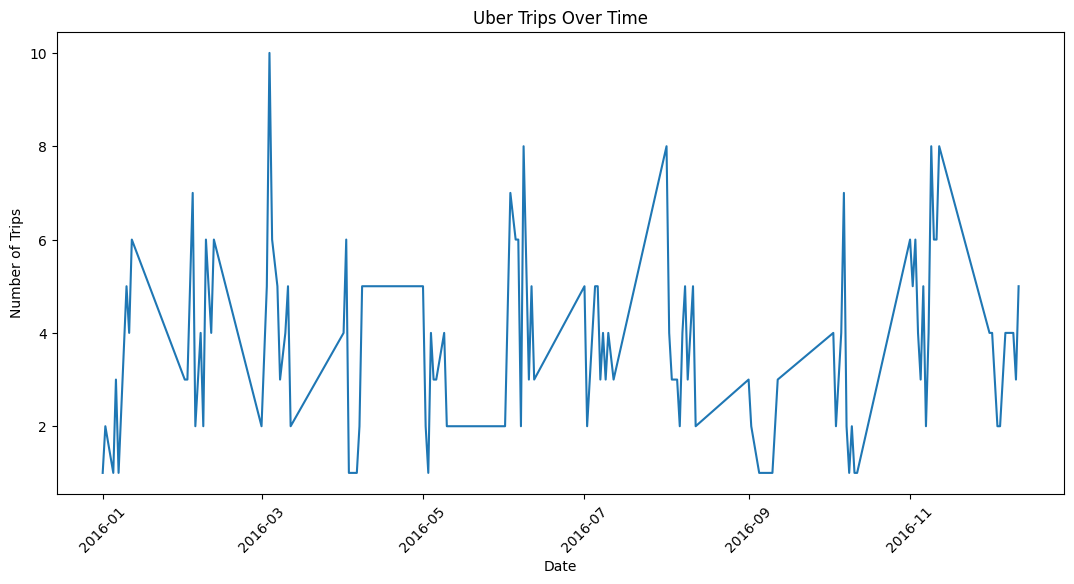

In [69]:
plt.figure(figsize=(13,6))
sns.lineplot(x=data['DATE'].value_counts().sort_index().index,y=data['DATE'].value_counts().sort_index().values)
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.title("Uber Trips Over Time")
plt.xticks(rotation=45)
plt.show()

From the graph, it is clear that there is **fluctuation** in number of trips over time. This shows that some days have **more number of trips while other have fewer**.

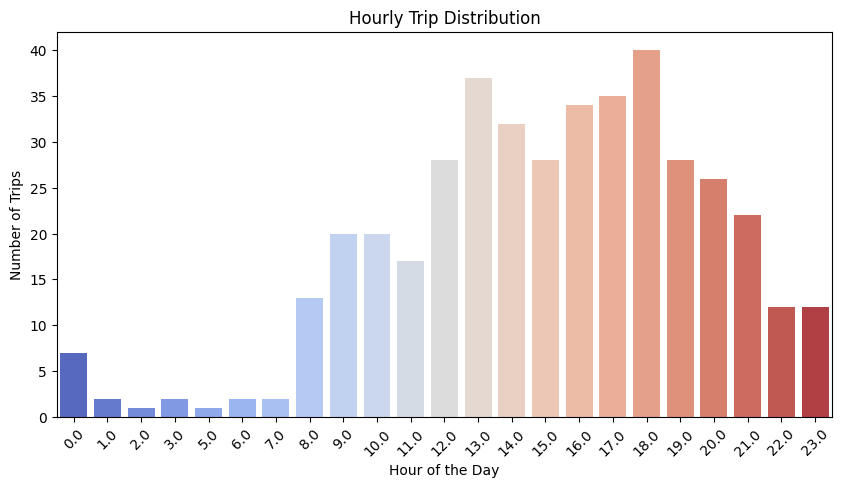

In [87]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['HOURS'],palette='coolwarm')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Hourly Trip Distribution')
plt.xticks(rotation=45)
plt.show()

This countplot of hourly trip distribution we can conclude following things:
- **Peak Usage:** Between 12P.M. - 8P.M., uber is heavily used during working hours and active travel times.
- **Low Usage:** From 1A.M - 6A.M., typical for non-operational or rest hours for most users.<br>
This trend shows that users are primarily rely on uber for work, errands, or leisure activities during afternoon and early morning.

In [71]:
purpose_counts = data['PURPOSE'].value_counts()

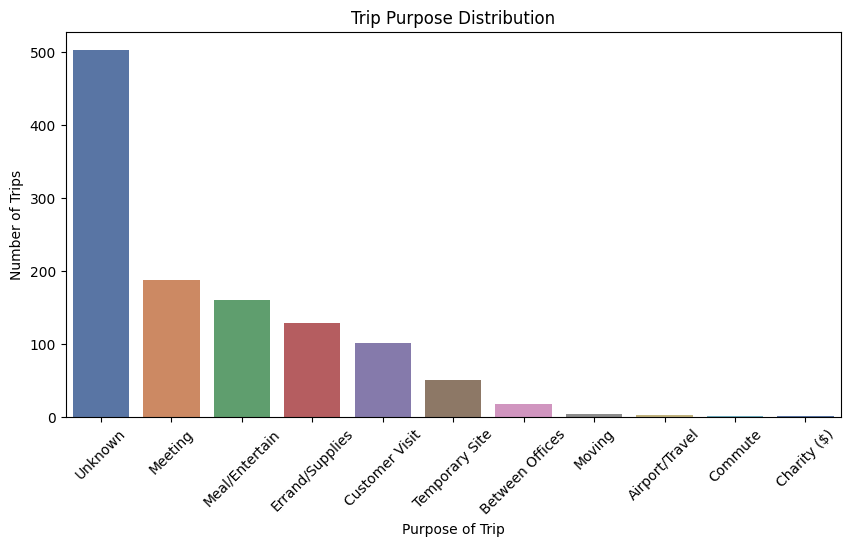

In [72]:
plt.figure(figsize=(10,5))
sns.barplot(x=purpose_counts.index, y=purpose_counts.values,palette='deep')
plt.xlabel('Purpose of Trip')
plt.ylabel('Number of Trips')
plt.title('Trip Purpose Distribution')
plt.xticks(rotation=45)
plt.show()

This shows, mostly uber trip are make these top 3 reasons:
- **Meeting**
- **Meal/Entertain**
- **Errand/Supplies**<br>
While very high significant number of uber trips are **Unknown** (which can be the caused due to unlogged entry).

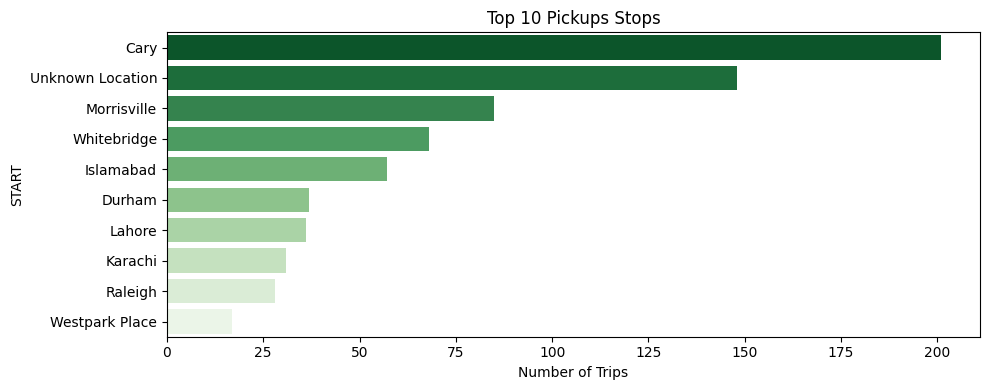

In [73]:
top_pickups = data['START'].value_counts().head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=top_pickups.values, y=top_pickups.index, palette='Greens_r')
plt.xlabel('Number of Trips')
plt.title('Top 10 Pickups Stops')
plt.tight_layout()
plt.show()

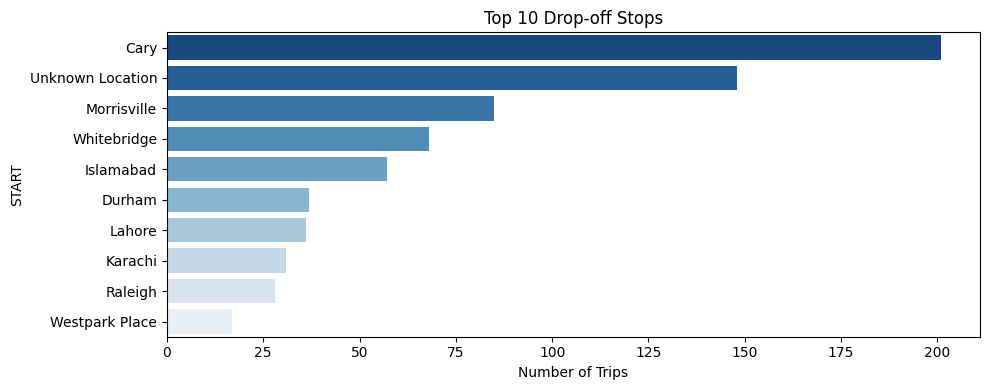

In [74]:
top_dropoff = data['STOP'].value_counts().head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=top_pickups.values, y=top_pickups.index, palette='Blues_r')
plt.xlabel('Number of Trips')
plt.title('Top 10 Drop-off Stops')
plt.tight_layout()
plt.show()

From the top 10 pickups and drop-off locations barplots, we conclude that:
- **Cary** is the top pickup and drop-off location, which sugggest this location a major travel hub.
- The second most frequent stop is an **Unknown Location**, which is suspiciously high. This could indicate either **GPS or data recording errors or Trips that started or ended outside mapped areas**.
- In both the barplots, **mostly pickups and drop-off locations are same**, which suggest that there is high traffic flow in both directions.

In [76]:
trip_by_category = data['CATEGORY'].value_counts()
trip_by_category

CATEGORY
Business    1078
Personal      77
Name: count, dtype: int64

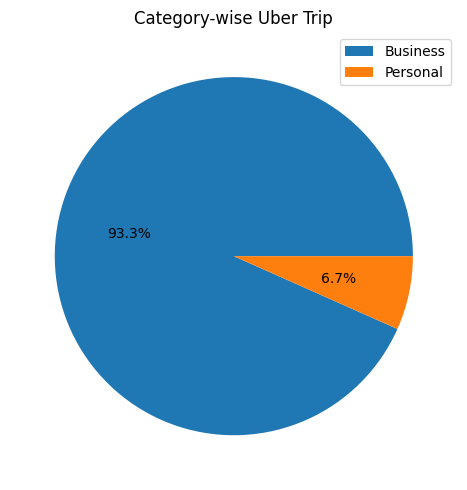

In [81]:
plt.figure(figsize=(12,5))
plt.pie(trip_by_category.values,autopct='%1.1f%%')
plt.legend(labels=trip_by_category.index)
plt.title('Category-wise Uber Trip')
plt.tight_layout()
plt.show()

This pie chart indicate, mostly uber is heavily used for  **BUSINEES** related travels (e.g. meeting, customer visits, commuting).

This suggest that, mostly company employees are using Uber more as a professional commuting tool than for personal errands.

In [82]:
avg_miles_purpose = data.groupby(by='PURPOSE')['MILES'].mean().sort_values()
avg_miles_purpose

PURPOSE
Errand/Supplies      3.968750
Moving               4.550000
Airport/Travel       5.500000
Meal/Entertain       5.698125
Unknown              9.748008
Temporary Site      10.474000
Between Offices     10.944444
Charity ($)         15.100000
Meeting             15.247594
Customer Visit      20.688119
Commute            180.200000
Name: MILES, dtype: float64

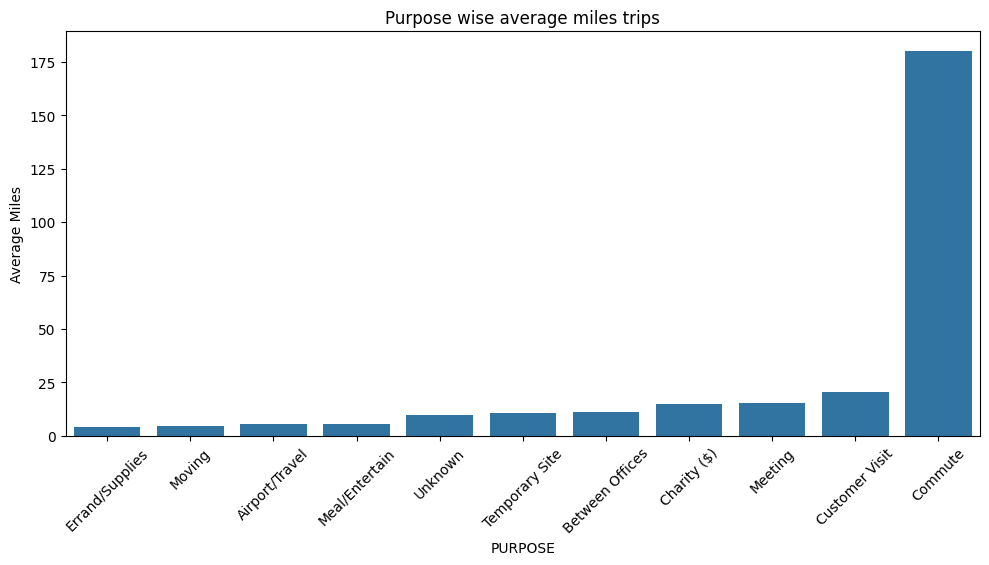

In [85]:
plt.figure(figsize=(10,5))
sns.barplot(x=avg_miles_purpose.index, y=avg_miles_purpose.values)
plt.xlabel('PURPOSE')
plt.ylabel('Average Miles')
plt.title('Purpose wise average miles trips')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Purpose-wise average miles trips, we can conclude the following things:
- **Commute** stand out massively with the highest average mileage **(~180+ miles)**, which is likely **due to long-distance or intercity commutes**.
- Other **business-related purposes (customer visit, meeting, charity & between offices)** have moderate average trip distances **(~15-20 miiles)**, indicating these purposes involve traveling across different office locations, client sited or city zones.
- Other trips are likely **local or within a small neighbourhood**.

# Conclusion

The EDA performed on the Uber dataset provided valuable insights into travel patterns. Here are the key findings:

- **Missing Data:** The dataset has missing values, especially in the `PURPOSE` column, where a significant portion of entries lacks trip purpose information.
- **Trip Categories:** The majority of trips are categorized as **Business** (1078 trips), with only a small percentage classified as **Personal** (77 trips). This indicates that the dataset primarily consists of business-related trips.
- **Trip Distance:** The mileage data shows high variability, ranging from **0.5 miles to 12,204.7 miles**, with a mean of approximately **21 miles**. The extreme max value suggests possible outliers or long-distance rides.
- **Most Frequent Locations:** The most common pickup locations include **Cary, Morrisville, and Whitebridge**, while `Unknown Location` also appears frequently in the `STOP` column, indicating potential data inconsistencies or missing location names.
- **Data Cleaning Steps:** Filtering locations with special characters helped refine the dataset, and replacing `?` in the `START` and `STOP` columns improved data consistency.
- **Visualizations:** A pie chart illustrating trip categories showed that business trips dominate the dataset.

Overall, the dataset provides a strong representation of business travel habits.

# Suggestions
- Address missing values in `END_DATE`, `PURPOSE`, and **unknown** locations through better **logging mechanisms**.
- Consider targeting promotions or discounts during low-demand hours **(e.g. 1–6 AM)** to increase usage.
- Enhance vehicle availability between **12 PM to 8 PM** based on peak trip demand.
- Focus on **corporate tie-ups** as most trips are for business.
- Create packages for long-distance commute rides.
- Investigate **Unknown** locations to ensure GPS accuracy and possibly improve route data collection.